## Setup: load data


In [1]:
import polars as pl
from pathlib import Path

dat_dict = {
    "iedb_human_I": {},
    "iedb_human_II": {},
    "iedb_mouse_I": {},
    "iedb_mouse_II": {},
    "vdjdb_human_I": {},
    "vdjdb_human_II": {},
    "vdjdb_mouse_I": {},
    "vdjdb_mouse_II": {},
}

iedb_human_I_datpath = Path("../data/iedb-vdjdb/iedb/human_I/iedb_human_I.csv")
iedb_human_I = pl.read_csv(iedb_human_I_datpath)
iedb_human_I_infdir = Path("../data/iedb-vdjdb/iedb/human_I/inference")

dat_dict["iedb_human_I"]["df"] = iedb_human_I
dat_dict["iedb_human_I"]["infdir"] = iedb_human_I_infdir
dat_dict["iedb_human_I"]["path"] = iedb_human_I_datpath


iedb_human_II_datpath = Path(
    "../data/iedb-vdjdb/iedb/human_II/iedb_human_II.csv"
)
iedb_human_II = pl.read_csv(iedb_human_II_datpath)
iedb_human_II_infdir = Path("../data/iedb-vdjdb/iedb/human_II/inference")

dat_dict["iedb_human_II"]["df"] = iedb_human_II
dat_dict["iedb_human_II"]["infdir"] = iedb_human_II_infdir
dat_dict["iedb_human_II"]["path"] = iedb_human_II_datpath

iedb_mouse_I_datpath = Path("../data/iedb-vdjdb/iedb/mouse_I/iedb_mouse_I.csv")
iedb_mouse_I = pl.read_csv(iedb_mouse_I_datpath)
iedb_mouse_I_infdir = Path("../data/iedb-vdjdb/iedb/mouse_I/inference")

dat_dict["iedb_mouse_I"]["df"] = iedb_mouse_I
dat_dict["iedb_mouse_I"]["infdir"] = iedb_mouse_I_infdir
dat_dict["iedb_mouse_I"]["path"] = iedb_mouse_I_datpath

iedb_mouse_II_datpath = Path(
    "../data/iedb-vdjdb/iedb/mouse_II/iedb_mouse_II.csv"
)
iedb_mouse_II = pl.read_csv(iedb_mouse_II_datpath)
iedb_mouse_II_infdir = Path("../data/iedb-vdjdb/iedb/mouse_II/inference")

dat_dict["iedb_mouse_II"]["df"] = iedb_mouse_II
dat_dict["iedb_mouse_II"]["infdir"] = iedb_mouse_II_infdir
dat_dict["iedb_mouse_II"]["path"] = iedb_mouse_II_datpath

vdjdb_human_I_datpath = Path(
    "../data/iedb-vdjdb/vdjdb/human_I/vdjdb_human_I.csv"
)
vdjdb_human_I = pl.read_csv(
    "../data/iedb-vdjdb/vdjdb/human_I/vdjdb_human_I.csv"
)
vdjdb_human_I_infdir = Path("../data/iedb-vdjdb/vdjdb/human_I/inference")

dat_dict["vdjdb_human_I"]["df"] = vdjdb_human_I
dat_dict["vdjdb_human_I"]["infdir"] = vdjdb_human_I_infdir
dat_dict["vdjdb_human_I"]["path"] = vdjdb_human_I_datpath


vdjdb_human_II_datpath = Path(
    "../data/iedb-vdjdb/vdjdb/human_II/vdjdb_human_II.csv"
)
vdjdb_human_II = pl.read_csv(vdjdb_human_II_datpath)
vdjdb_human_II_infdir = Path("../data/iedb-vdjdb/vdjdb/human_II/inference")

dat_dict["vdjdb_human_II"]["df"] = vdjdb_human_II
dat_dict["vdjdb_human_II"]["infdir"] = vdjdb_human_II_infdir
dat_dict["vdjdb_human_II"]["path"] = vdjdb_human_II_datpath


vdjdb_mouse_I_datpath = Path(
    "../data/iedb-vdjdb/vdjdb/mouse_I/vdjdb_mouse_I.csv"
)
vdjdb_mouse_I = pl.read_csv(
    "../data/iedb-vdjdb/vdjdb/mouse_I/vdjdb_mouse_I.csv"
)
vdjdb_mouse_I_infdir = Path("../data/iedb-vdjdb/vdjdb/mouse_I/inference")

dat_dict["vdjdb_mouse_I"]["df"] = vdjdb_mouse_I
dat_dict["vdjdb_mouse_I"]["infdir"] = vdjdb_mouse_I_infdir
dat_dict["vdjdb_mouse_I"]["path"] = vdjdb_mouse_I_datpath

vdjdb_mouse_II_datpath = Path(
    "../data/iedb-vdjdb/vdjdb/mouse_II/vdjdb_mouse_II.csv"
)
vdjdb_mouse_II = pl.read_csv(vdjdb_mouse_II_datpath)
vdjdb_mouse_II_infdir = Path("../data/iedb-vdjdb/vdjdb/mouse_II/inference")

dat_dict["vdjdb_mouse_II"]["df"] = vdjdb_mouse_II
dat_dict["vdjdb_mouse_II"]["infdir"] = vdjdb_mouse_II_infdir
dat_dict["vdjdb_mouse_II"]["path"] = vdjdb_mouse_II_datpath

In [8]:
from sklearn.linear_model import LinearRegression, LogisticRegression
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
import numpy as np


def train_model(train_df, featnames, **kwargs):
    n_feat = len(featnames)
    output = ["cognate"]
    train_np = train_df.select(featnames + output).to_numpy()
    X_train = train_np[:, :n_feat]
    y_train = train_np[:, n_feat]
    model = LogisticRegression(**kwargs)
    model.fit(X_train, y_train)

    return model


def test_model(model, featnames, test_df):
    n_feat = len(featnames)
    output = ["cognate"]

    test_np = test_df.select(featnames + output).to_numpy()
    X_test = test_np[:, :n_feat]
    y_test = test_np[:, n_feat]

    y_pred_proba = model.predict_proba(X_test)[:, 1]

    fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred_proba)
    roc_auc = metrics.auc(fpr, tpr)
    return fpr, tpr, threshold, roc_auc

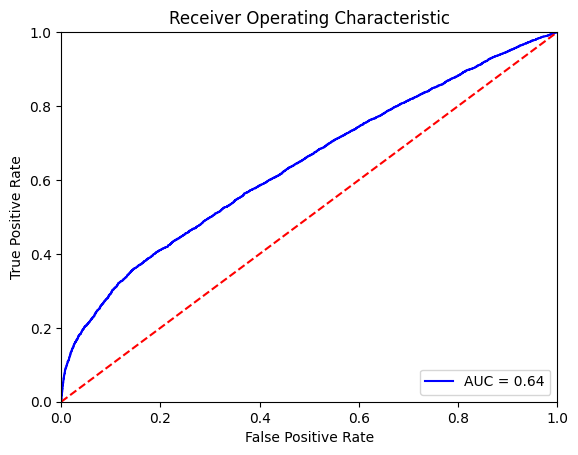

In [16]:
import matplotlib.pyplot as plt

featnames = [
    "peptide_min_pLDDT",
    "tcr_cdr3_min_pLDDT",
    "mhc_helicies_min_pLDDT",
    "peptide_tcr_contacts",
    "tcr_mhc_contacts",
    "min_tcr_p_pae",
    "min_tcr_m_pae",
    "mean_tcr_pmhc_pae",
    "ptm",
    "iptm",
]

# shuffle
df = dat_dict["iedb_human_I"]["df"].sample(fraction=1, shuffle=True)

test_size = int(df.height * 0.1)

train, test = df.head(test_size), df.tail(-test_size)

model = train_model(train, featnames, max_iter=10000)

fpr, tpr, threshold, roc_auc = test_model(
    model,
    featnames,
    test,
)

plt.title("Receiver Operating Characteristic")
plt.plot(fpr, tpr, "b", label="AUC = %0.2f" % roc_auc)
plt.legend(loc="lower right")
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

In [ ]:
dat_dict["iedb_human_I"]["df"]

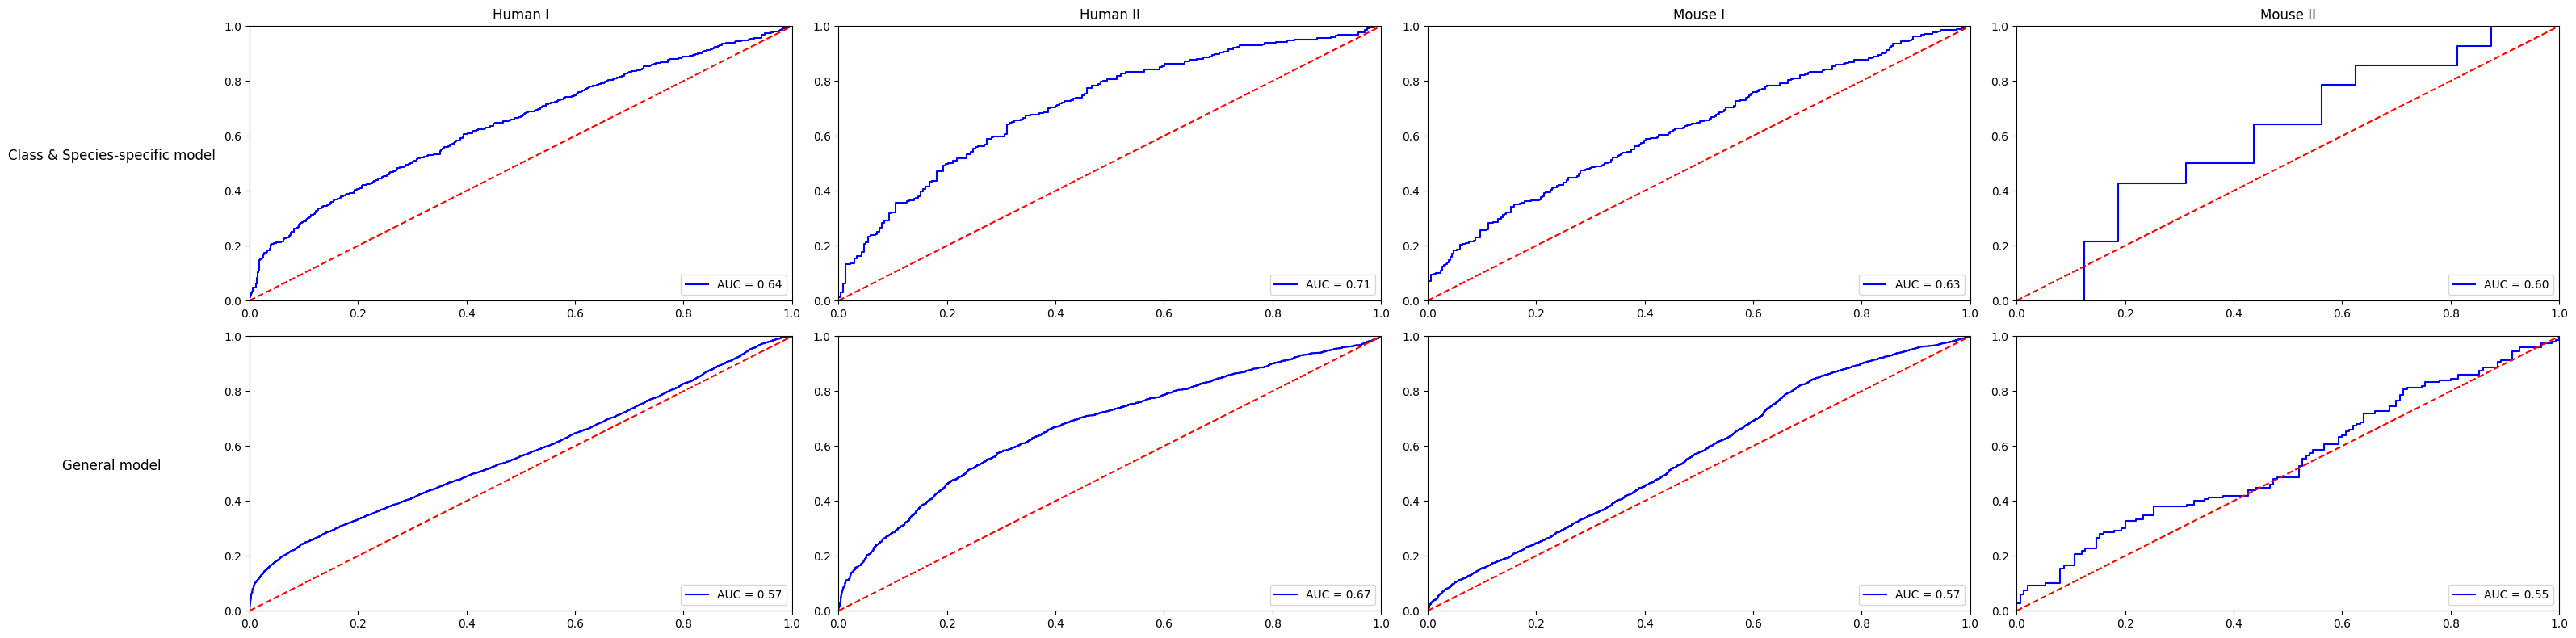

In [43]:
import matplotlib.pyplot as plt
import polars as pl


featnames = [
    "peptide_min_pLDDT",
    "tcr_cdr3_min_pLDDT",
    "mhc_helicies_min_pLDDT",
    "peptide_tcr_contacts",
    "tcr_mhc_contacts",
    "min_tcr_p_pae",
    "min_tcr_m_pae",
    "mean_tcr_pmhc_pae",
    "ptm",
    "iptm",
]

dfs = [
    dat_dict["iedb_human_I"]["df"],
    pl.concat(
        [dat_dict["iedb_human_II"]["df"], dat_dict["vdjdb_human_II"]["df"]]
    ),
    pl.concat(
        [dat_dict["iedb_mouse_I"]["df"], dat_dict["vdjdb_mouse_I"]["df"]]
    ),
    pl.concat(
        [dat_dict["iedb_mouse_II"]["df"], dat_dict["vdjdb_mouse_II"]["df"]]
    ),
]

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(32, 8))

# class-specific
for i, df in enumerate(dfs):
    ax = axes[0][i]

    curr_df = df.sample(fraction=1, shuffle=True)

    test_size = int(curr_df.height * 0.1)

    test, train = curr_df.head(test_size), curr_df.tail(-test_size)

    model = train_model(train, featnames, max_iter=10000)

    fpr, tpr, threshold, roc_auc = test_model(
        model,
        featnames,
        test,
    )

    ax.plot(fpr, tpr, "b", label=f"AUC = {roc_auc:0.2f}")
    ax.legend(loc="lower right")
    ax.plot([0, 1], [0, 1], "r--")
    ax.set_xlim([0, 1])
    ax.set_ylim([0, 1])

all_dfs_index = set(range(4))

# general
for i, df in enumerate(dfs):
    ax = axes[1][i]

    test_df = df

    # if i in [0, 2]:
    #     train_idx = [1, 3]
    # else:
    #     train_idx = [0, 2]

    # train_df = pl.concat([dfs[i] for i in train_idx])
    train_idx = i + 1 + (-2 * (i % 2))
    train_df = dfs[train_idx]

    model = train_model(train_df, featnames, max_iter=10000)

    fpr, tpr, threshold, roc_auc = test_model(
        model,
        featnames,
        test_df,
    )

    ax.plot(fpr, tpr, "b", label=f"AUC = {roc_auc:0.2f}")
    ax.legend(loc="lower right")
    ax.plot([0, 1], [0, 1], "r--")
    ax.set_xlim([0, 1])
    ax.set_ylim([0, 1])

# # label rows and cols
for ax, row in zip(axes[:, 0], ["Class-specific model", "Cross-class model"]):
    ax.set_ylabel(row, rotation=0, size="large", labelpad=100)


for ax, col in zip(axes[0], ["Human I", "Human II", "Mouse I", "Mouse II"]):
    ax.set_title(col, rotation=0, size="large")


plt.tight_layout()
plt.show()